In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')
%matplotlib inline

In [3]:
## 데이터 분석 과정
## 주제--수집--전처리--EDA--예측시스템(회귀, 분류)--실제예측--시각화/서비스구현
## y = ax + b, a는 기울기, b는 y절편, x는 변수값
## y = ax1 + cx2 + dx3 + b
## y = 죽을것인가/살것인가에 대한 결과 예측값
## x1, x2, x3가 결과를 결정하는 변수들
## => age, pclass, alone

In [4]:
raw_data = pd.read_excel('../csv-data/titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
svc = raw_data['survived'].value_counts()
svc

0    809
1    500
Name: survived, dtype: int64

In [8]:
type(svc) ##index+values

pandas.core.series.Series

In [9]:
svc.index = ['death', 'alive']

In [10]:
svc

death    809
alive    500
Name: survived, dtype: int64

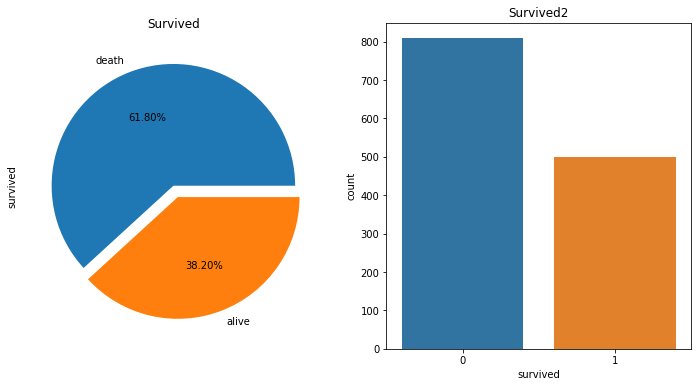

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,6))

# raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
#                                              autopct='%1.2f%%',ax=ax[0])

svc.plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('Survived')

sns.countplot('survived', data=raw_data, ax = ax[1])
ax[1].set_title('Survived2')
plt.show()

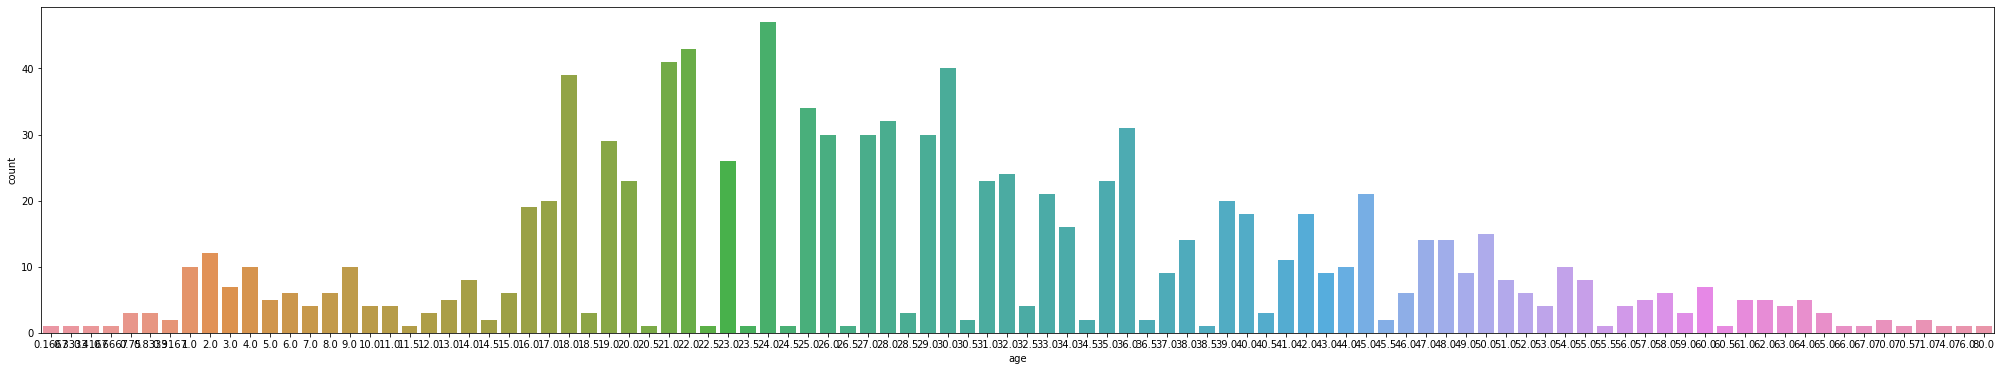

In [12]:
## age의 분포를 그려보세요.
plt.figure(figsize=(35,6))
sns.countplot('age', data=raw_data)
plt.show()

In [13]:
## pclass별 평균
raw_data.groupby(by='pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [15]:
## 변수들간의 상관도
rd_corr = raw_data.corr()
rd_corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


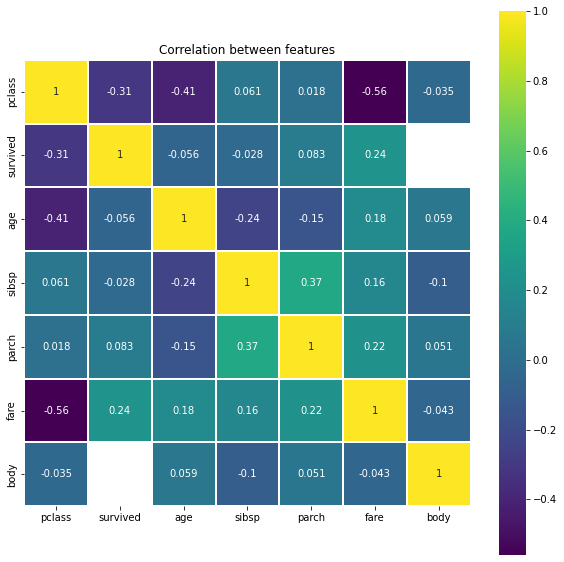

In [14]:
## heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(rd_corr, linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [15]:
# 성별 카운트
rd_sex = raw_data['sex'].value_counts()
rd_sex

male      843
female    466
Name: sex, dtype: int64

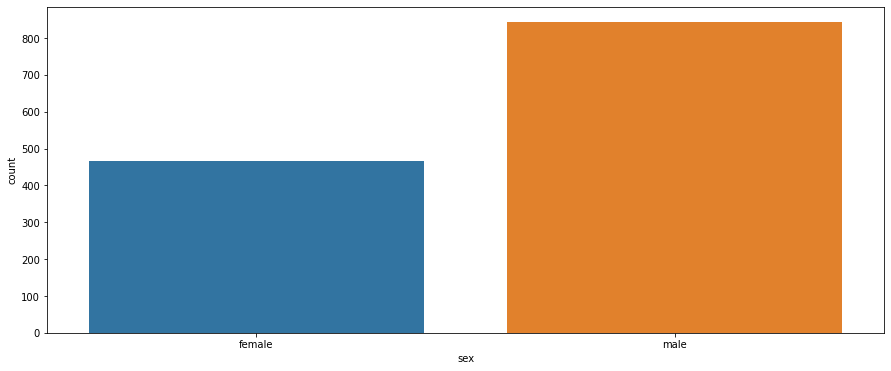

In [16]:
plt.figure(figsize=(15,6))
sns.countplot('sex', data=raw_data)
plt.show()

In [17]:
# 성별 생사인원 구해보고, 그래프로 그려보세요!
sex_alive = raw_data.groupby(by='sex')['survived'].sum() #1을 다 더하면, 생존인원이 될 것임.
print(sex_alive)
list_sa = list(sex_alive)
list_sa.reverse()
list_sa ##생존인원

sex
female    339
male      161
Name: survived, dtype: int64


[161, 339]

In [18]:
print(rd_sex) #탑승인원
rd_sex_list = list(rd_sex)
rd_sex_list

male      843
female    466
Name: sex, dtype: int64


[843, 466]

In [19]:
for i in range(2):
    print(rd_sex.index[i])
    print('생존인원: ',list_sa[i], ' <-> 탑승인원: ',  rd_sex_list[i])
    print('----------------------------------------')

male
생존인원:  161  <-> 탑승인원:  843
----------------------------------------
female
생존인원:  339  <-> 탑승인원:  466
----------------------------------------


In [20]:
sex_df = pd.DataFrame({'alive' : list_sa, 'board' : rd_sex_list}, index=['male', 'female'])
sex_df

,alive,board
male,161,843
female,339,466


In [21]:
dead_result = sex_df['board'] - sex_df['alive']
dead_result

male      682
female    127
dtype: int64

In [22]:
dead_result.index = ['male', 'female']

In [23]:
dead_result

male      682
female    127
dtype: int64

In [24]:
sex_df.reset_index(inplace=True)

In [25]:
sex_df

,index,alive,board
0,male,161,843
1,female,339,466


<AxesSubplot:xlabel='index', ylabel='alive'>

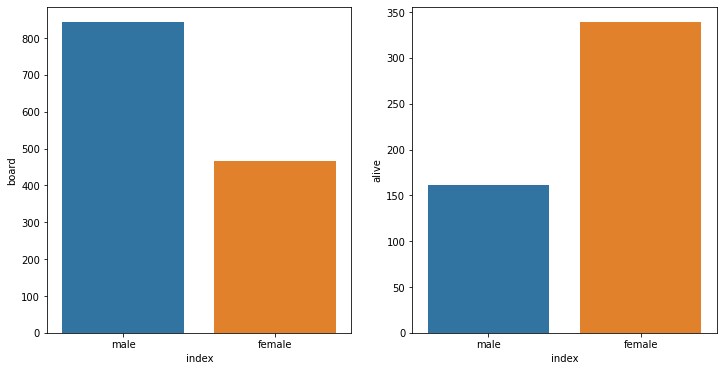

In [26]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.barplot('index', 'board', data=sex_df, ax=ax[0])
sns.barplot('index', 'alive', data=sex_df, ax=ax[1])

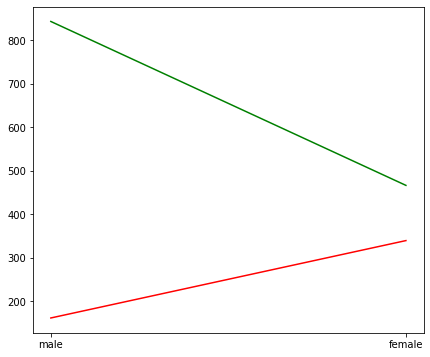

In [27]:
plt.figure(figsize=(7, 6))
plt.plot(sex_df['index'], sex_df['board'], color='g')
plt.plot(sex_df['index'], sex_df['alive'], color='r')
plt.show()

In [28]:
sex_df.set_index('index', inplace=True)

In [29]:
sex_df

,alive,board
index,,
male,161,843
female,339,466


<Figure size 504x432 with 0 Axes>

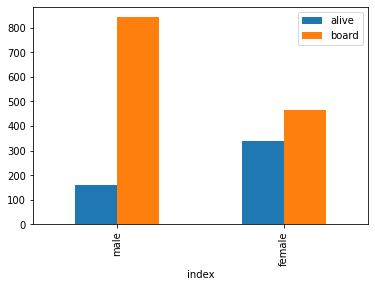

In [30]:
plt.figure(figsize=(7, 6))
sex_df.plot(kind='bar')
plt.show()

In [31]:
# sibsp: 함께 탑승한 형제자매나 배우자 수
# parch: 함께 탑승한 부모나 자녀의 수

In [32]:
# age가 결측치(NaN)가 들어있는데,
# 어떻게 해야하는가?
# 1. 컬럼삭제 : 너무 결측치가 많은 경우, 상관도가 다른 변수들에 비해서 많이 낮은 경우
# 2. 행삭제 : 결측치가 있는 instance만 삭제, 행을 삭제해도 다른 instance가 많이 남아있는 경우
# 3. 다른 값으로 대체 : 대체해도 크게 문제가 없을 때, 다른 instance가 많지 않은 경우
#     다른 값>> 숫자인 경우: 0(최소값), 평균치(전체 데이터의 분포를 깨지 않을 목적)
#                     문자인 경우: 해당사항없음, 값을 목록을 만들어서 랜덤하게 넣음.

In [33]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [34]:
## 나이를 평균으로 대체하려고 함.
## 나이의 평균을 구해주세요.!
age_mean = raw_data['age'].mean()
print(age_mean)

## age컬럼중에 nan을 평균으로 대체해주세요.!
raw_data['age'].fillna(age_mean, inplace=True)

## nan이 있는지 없는지 결과를 확인!
raw_data['age'].isnull().sum()

29.8811345124283


0

In [35]:
#나이대별 카운트
#나이대별 생사인원

In [36]:
## 나이대별 값의 범위가 너무 많아서 범위를 묶기로 함.
raw_data['age_cat'] = pd.cut(raw_data['age'],
                                            bins = [0, 20, 35, 55, 100],
                                            include_lowest=True,
                                            labels= ['children','young','adult','old']
                            )
raw_data['age_cat'][:5]

0       young
1    children
2    children
3       young
4       young
Name: age_cat, dtype: category
Categories (4, object): ['children' < 'young' < 'adult' < 'old']

In [37]:
raw_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat'],
      dtype='object')

In [38]:
raw_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children


In [39]:
# 컬럼삭제: ticket, cabin, embarked, body, boat, home.dest 후 확인
raw_data.drop(columns=['ticket', 'cabin', 'embarked', 'body', 'boat', 'home.dest'], inplace=True)
raw_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,children


In [40]:
# age_cat별 평균을 내보세요.
raw_data.groupby(by='age_cat').mean()

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
children,2.568548,0.459677,12.782930,0.991935,0.745968,29.025169
young,2.442490,0.350474,28.124139,0.381597,0.217862,26.865154
adult,1.806084,0.410646,43.699620,0.403042,0.509506,47.149810
old,1.474576,0.322034,62.161017,0.322034,0.406780,70.663722


In [41]:
raw_data.groupby(by='age_cat')['survived'].mean()

age_cat
children    0.459677
young       0.350474
adult       0.410646
old         0.322034
Name: survived, dtype: float64

In [42]:
raw_data[:3]

,pclass,survived,name,sex,age,sibsp,parch,fare,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,children
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,children


In [43]:
del raw_data['name']

In [44]:
raw_data[:3]

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,female,29.0000,0,0,211.3375,young
1,1,1,male,0.9167,1,2,151.5500,children
2,1,0,female,2.0000,1,2,151.5500,children


In [45]:
def func(x):
    if x == 'female':
        return 0
    else:
        return 1

In [46]:
raw_data['sex'] = raw_data['sex'].apply(func)
raw_data['sex'][:2]

0    0
1    1
Name: sex, dtype: int64

In [47]:
raw_data[:3]

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.0000,0,0,211.3375,young
1,1,1,1,0.9167,1,2,151.5500,children
2,1,0,0,2.0000,1,2,151.5500,children


In [48]:
## age_cat 'children' : 0, 'young : 1' ,'adult : 2','old : 3'
def func2(x):
    if x == 'children':
        return 0
    elif x == 'young':
        return 1
    elif x == 'adult':
        return 2
    else:
        return 3

In [49]:
raw_data['age_cat'] = raw_data['age_cat'].apply(func2)
raw_data['age_cat'][:2]

0    1
1    0
Name: age_cat, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [50]:
raw_data[:3]

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.0000,0,0,211.3375,1
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0


In [51]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   int64   
 2   sex       1309 non-null   int64   
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   int64   
 5   parch     1309 non-null   int64   
 6   fare      1308 non-null   float64 
 7   age_cat   1309 non-null   category
dtypes: category(1), float64(2), int64(5)
memory usage: 73.2 KB


In [52]:
raw_data['fare'].isnull().sum()

1

In [53]:
raw_data['fare'].fillna(raw_data['fare'].mean(), inplace=True)

In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   int64   
 2   sex       1309 non-null   int64   
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   int64   
 5   parch     1309 non-null   int64   
 6   fare      1309 non-null   float64 
 7   age_cat   1309 non-null   category
dtypes: category(1), float64(2), int64(5)
memory usage: 73.2 KB


In [55]:
raw_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.0000,0,0,211.3375,1
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0
3,1,0,1,30.0000,1,2,151.5500,1
4,1,0,0,25.0000,1,2,151.5500,1


In [56]:
## 1. 먼저 공부를 많이 하고(연습용 데이터, 훈련 데이터, train data)
## 2. 모의고사 (75점 이상) (검증용 데이터, test data)
## ==> data를 나누어보자!

## 3. 실제로 예측하는 프로그램 사용할 예정-> 본시험!

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
df_data = raw_data[['pclass', 'age', 'sex', 'sibsp', 'parch', 'fare', 'survived']]
df_data[:5]

,pclass,age,sex,sibsp,parch,fare,survived
0,1,29.0000,0,0,0,211.3375,1
1,1,0.9167,1,1,2,151.5500,1
2,1,2.0000,0,1,2,151.5500,0
3,1,30.0000,1,1,2,151.5500,0
4,1,25.0000,0,1,2,151.5500,0


In [59]:
df_data[['pclass', 'age', 'sex', 'sibsp', 'parch', 'fare']]

,pclass,age,sex,sibsp,parch,fare
0,1,29.000000,0,0,0,211.3375
1,1,0.916700,1,1,2,151.5500
2,1,2.000000,0,1,2,151.5500
3,1,30.000000,1,1,2,151.5500
4,1,25.000000,0,1,2,151.5500
...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542
1305,3,29.881135,0,1,0,14.4542
1306,3,26.500000,1,0,0,7.2250
1307,3,27.000000,1,0,0,7.2250


In [60]:
exam = df_data.iloc[:, :6]
exam

,pclass,age,sex,sibsp,parch,fare
0,1,29.000000,0,0,0,211.3375
1,1,0.916700,1,1,2,151.5500
2,1,2.000000,0,1,2,151.5500
3,1,30.000000,1,1,2,151.5500
4,1,25.000000,0,1,2,151.5500
...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542
1305,3,29.881135,0,1,0,14.4542
1306,3,26.500000,1,0,0,7.2250
1307,3,27.000000,1,0,0,7.2250


In [61]:
target = df_data['survived']
target[:2]

0    1
1    1
Name: survived, dtype: int64

In [62]:
## 훈련, 검증용 데이터를 분류
## 문제 + 답
## 훈련문제 + 훈련답
## 검증문제 + 검증답

In [63]:
import random
random.seed(42) #시드 == 씨앗, 씨앗값
for _ in range(10):
    print(random.randint(1, 10), end=' ')

2 1 5 4 4 3 2 9 2 10 

In [64]:
# 훈련문제, 검증문제, 훈련답, 검증답
# X_train, X_test, y_train, y_test
train_exam, test_exam, train_target, test_target = train_test_split(exam,  #문제
                        target, #정답
                        test_size=0.2, #검증비율 20%, 훈련비율 80%
                        random_state=100 #seed
                )

In [65]:
train_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 16 to 792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1047 non-null   int64  
 1   age     1047 non-null   float64
 2   sex     1047 non-null   int64  
 3   sibsp   1047 non-null   int64  
 4   parch   1047 non-null   int64  
 5   fare    1047 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 57.3 KB


In [66]:
train_target.count()

1047

In [67]:
test_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 173 to 22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  262 non-null    int64  
 1   age     262 non-null    float64
 2   sex     262 non-null    int64  
 3   sibsp   262 non-null    int64  
 4   parch   262 non-null    int64  
 5   fare    262 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 14.3 KB


In [68]:
test_target.count()

262

In [69]:
## 공부방법 선택: 공부방법이 정형화된 것(알고리즘, 방법론, 모델링)
## 공부방법론이 많으므로 컴퓨터가 학습할 방법론을 선택해서 알려주어야 함.
## 방법론은 클래스로 만들어져있음.

In [70]:
train_exam.head()

,pclass,age,sex,sibsp,parch,fare
16,1,24.0,1,0,1,247.5208
538,2,30.0,1,0,0,12.7375
532,2,41.0,1,0,0,13.0000
285,1,67.0,1,1,0,221.7792
365,2,44.0,0,1,0,26.0000


In [71]:
train_exam.reset_index(inplace=True)

In [72]:
train_exam.head()

,index,pclass,age,sex,sibsp,parch,fare
0,16,1,24.0,1,0,1,247.5208
1,538,2,30.0,1,0,0,12.7375
2,532,2,41.0,1,0,0,13.0000
3,285,1,67.0,1,1,0,221.7792
4,365,2,44.0,0,1,0,26.0000


In [73]:
del train_exam['index']

In [74]:
train_exam.head()

,pclass,age,sex,sibsp,parch,fare
0,1,24.0,1,0,1,247.5208
1,2,30.0,1,0,0,12.7375
2,2,41.0,1,0,0,13.0000
3,1,67.0,1,1,0,221.7792
4,2,44.0,0,1,0,26.0000


In [75]:
test_exam.head()

,pclass,age,sex,sibsp,parch,fare
173,1,32.500000,1,0,0,211.5000
843,3,29.881135,1,1,0,19.9667
996,3,33.000000,1,0,0,7.8958
992,3,30.500000,0,0,0,7.7500
12,1,24.000000,0,0,0,69.3000


In [76]:
test_exam.reset_index(inplace=True)

In [77]:
test_exam.head()

,index,pclass,age,sex,sibsp,parch,fare
0,173,1,32.500000,1,0,0,211.5000
1,843,3,29.881135,1,1,0,19.9667
2,996,3,33.000000,1,0,0,7.8958
3,992,3,30.500000,0,0,0,7.7500
4,12,1,24.000000,0,0,0,69.3000


In [78]:
del test_exam['index']

In [79]:
test_exam.head()

,pclass,age,sex,sibsp,parch,fare
0,1,32.500000,1,0,0,211.5000
1,3,29.881135,1,1,0,19.9667
2,3,33.000000,1,0,0,7.8958
3,3,30.500000,0,0,0,7.7500
4,1,24.000000,0,0,0,69.3000


In [80]:
test_target = test_target.reset_index()
test_target[:5]

,index,survived
0,173,0
1,843,0
2,996,0
3,992,0
4,12,1


In [81]:
del test_target['index']

In [82]:
test_target[:5]

,survived
0,0
1,0
2,0
3,0
4,1


In [83]:
train_target

16     0
538    1
532    0
285    0
365    0
      ..
802    0
53     0
350    1
79     1
792    0
Name: survived, Length: 1047, dtype: int64

In [84]:
train_target = train_target.reset_index()
del train_target['index']
train_target[:5]

,survived
0,0
1,1
2,0
3,0
4,0


In [139]:
print(train_target)
print(train_exam)
print(test_target)
print(test_exam)

      survived
0            0
1            1
2            0
3            0
4            0
...        ...
1042         0
1043         0
1044         1
1045         1
1046         0

[1047 rows x 1 columns]
      pclass        age  sex  sibsp  parch      fare
0          1  24.000000    1      0      1  247.5208
1          2  30.000000    1      0      0   12.7375
2          2  41.000000    1      0      0   13.0000
3          1  67.000000    1      1      0  221.7792
4          2  44.000000    0      1      0   26.0000
...      ...        ...  ...    ...    ...       ...
1042       3  29.881135    1      0      0    6.9500
1043       1  17.000000    1      0      0   47.1000
1044       2  15.000000    0      0      2   39.0000
1045       1  55.000000    0      2      0   25.7000
1046       3  15.000000    1      1      1    7.2292

[1047 rows x 6 columns]
     survived
0           0
1           0
2           0
3           0
4           1
..        ...
257         1
258         0
259     

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [102]:
tree_clf.fit(train_exam, train_target) #많이 공부!!

DecisionTreeClassifier(max_depth=3, random_state=42)

In [123]:
tree_clf.score(train_exam, train_target) 
#많이 공부한 것에 대한 점수
#train data 에 대한 정확도!(accuracy, 어큐러시)

0.8194842406876791

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
com_target = tree_clf.predict(test_exam) #모의고사를 풀어보자! -> 문제를 푼 답!
com_target[:5]
#검증용 데이터로 검증
# 검증해본 결과 test data에 대한 정확도!
# 컴퓨터가 예측한 값들과 검증용 데이터의 정답과의 비교, 정확도를 계산할 예정!

array([0, 0, 0, 1, 1], dtype=int64)

In [126]:
accuracy_score(test_target, com_target) #문제를 푼 답과 정답지를 비교해서 채점!
# 정확도, 정답률

0.8053435114503816

In [127]:
train_exam.columns

Index(['pclass', 'age', 'sex', 'sibsp', 'parch', 'fare'], dtype='object')

In [128]:
dicaprio = [3, 19, 1, 0, 0, 5]

In [129]:
result1 = tree_clf.predict_proba([dicaprio])
result1
## 결과는 index순으로 보면 됨.
## array([[1., 0.]]) : index 0(죽음)일 가능성 100%, index 1(살았음)일 가능성 0%

array([[0.87374749, 0.12625251]])

In [130]:
result1[0][0] ##죽었을 가능성

0.87374749498998

In [131]:
result1[0][1] ##살았을 가능성

0.12625250501002003

In [132]:
if result1[0][0] > result1[0][1]:
        print('죽을 가능성이  더 높다.')
        print('가능성 지수는 ', int(result1[0][0] * 100), '%')
else:
        print('살 가능성이  더 높다.')
        print('가능성 지수는 ', result1[0][1] * 100, '%')

죽을 가능성이  더 높다.
가능성 지수는  87 %


In [133]:
winslet = [1, 17, 0, 1, 1, 100]

In [134]:
result2 = tree_clf.predict_proba([winslet ])
result2

array([[0.02255639, 0.97744361]])

In [135]:
if result1[0][0] > result1[0][1]:
        print('죽을 가능성이 더 높다.')
        print('가능성 지수는 ', int(result1[0][0] * 100), '%')
else:
        print('살 가능성이  더 높다.')
        print('가능성 지수는 ', result1[0][1] * 100, '%')

죽을 가능성이 더 높다.
가능성 지수는  87 %


In [136]:
def func3(r):
    if r[0][0] > r[0][1]:
            print('죽을 가능성이 더 높다.')
            print('가능성 지수는 ', int(r[0][0] * 100), '%')
    else:
            print('살 가능성이  더 높다.')
            print('가능성 지수는 ', r[0][1] * 100, '%')

In [137]:
func3(result2)

살 가능성이  더 높다.
가능성 지수는  97.74436090225564 %


In [138]:
## predict_proba함수의 입력타입은 [[]] 2차원 리스트가 되어야함.
result3 = tree_clf.predict_proba([dicaprio, winslet]) ## 윈슬릿은 살았음.
result3 ##결과도 무조건 [[]] 2차원 리스트

array([[0.87374749, 0.12625251],
       [0.02255639, 0.97744361]])

In [141]:
print(tree_clf.feature_importances_)
#'pclass', 'age', 'sex', 'sibsp', 'parch', 'fare'

[0.17721694 0.04086365 0.68203511 0.05128195 0.         0.04860236]


In [142]:
#가중치가 거의 없었던 피쳐는 'sibsp', 'parch', 'fare' 
#가중치가 중간정도 있었던 피쳐는 'pclass'
#가중치가 제일 컸던 피쳐는 'sex'

In [143]:
#그래프로 그려보세요
x = ['pclass', 'age', 'sex', 'sibsp', 'parch', 'fare']
y = tree_clf.feature_importances_


In [149]:
result_df = pd.DataFrame({'feature':x, 'weight':y})
result_df

,feature,weight
0,pclass,0.177217
1,age,0.040864
2,sex,0.682035
3,sibsp,0.051282
4,parch,0.000000
5,fare,0.048602


<BarContainer object of 6 artists>

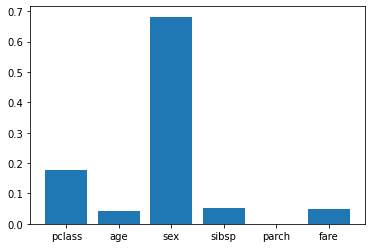

In [152]:
plt.bar(result_df['feature'], result_df['weight'])

<AxesSubplot:xlabel='feature', ylabel='weight'>

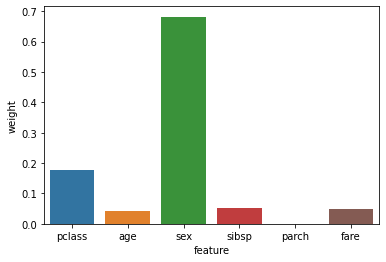

In [151]:
sns.barplot('feature', 'weight', data=result_df)
#weight: 가중치, 각 항목이 예측을 하는데 얼마나 영향력을 미쳤는가 정도

In [155]:
me = [2, 30, 1, 1, 2, 500]
result3 = tree_clf.predict_proba([me])
func3(result3)

죽을 가능성이 더 높다.
가능성 지수는  87 %


In [159]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [165]:
x = iris.loc[:, :'petal_width']
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [166]:
y = iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [168]:
random.seed(42) #시드 == 씨앗, 씨앗값
for _ in range(10):
    print(random.randint(1, 10), end=' ')

2 1 5 4 4 3 2 9 2 10 

In [169]:
 X_train, X_test, y_train, y_test = train_test_split(x,  #문제
                        y, #정답
                        test_size=0.2, #검증비율 20%, 훈련비율 80%
                        random_state=100 #seed
                )

In [170]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 81 to 8
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [171]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 128 to 120
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  30 non-null     float64
 1   sepal_width   30 non-null     float64
 2   petal_length  30 non-null     float64
 3   petal_width   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [172]:
y_train.count()

120

In [173]:
y_test.count()

30

In [174]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [175]:
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [179]:
tree_clf2.score(X_train, y_train)

0.9833333333333333

In [182]:
com_predict = tree_clf2.predict(X_test)

In [184]:
accuracy_score(y_test, com_predict)

0.9666666666666667

In [185]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [186]:
y_train.value_counts()

versicolor    44
setosa        39
virginica     37
Name: species, dtype: int64

In [188]:
tree_clf2.feature_importances_

array([0.        , 0.        , 0.59655894, 0.40344106])

In [190]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [199]:
result5 = tree_clf2.predict_proba([[2.1, 0.8, 2.4, 0.4]])
result5

array([[1., 0., 0.]])

In [197]:
def func4(x):
    if x==0:
        print('setosa!!')
    elif x==1:
        print('versicolor!!')
    else:
        print('virginica!!')

In [201]:
max_proba=max(result5[0])
max_index = list(result5[0]).index(max_proba)
print(max_index)

0


In [202]:
func4(max_index)

setosa!!
